# Quase lá

![](https://media.giphy.com/media/l1KVaj5UcbHwrBMqI/giphy.gif)


Estamos quase no final, vamos aprender só mais uma classe nova de modelos :)

## Mas por quê?

Vamos primeiro pegar um caso em que a Regressão Linear se dá bem :)

Vamos supor que é uma função que prevê a altura da pessoa dado o peso

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline 

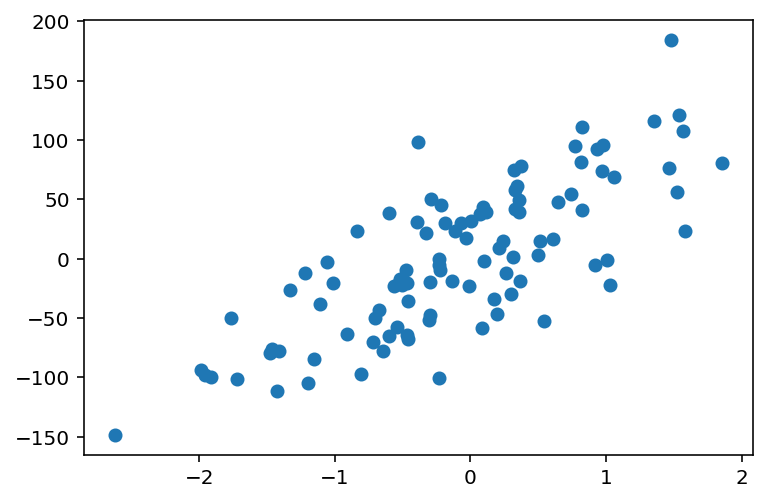

In [2]:
x, y = make_regression(n_samples=100, n_features=1, noise=45, random_state=42)
_ = plt.scatter(x,y)

In [3]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

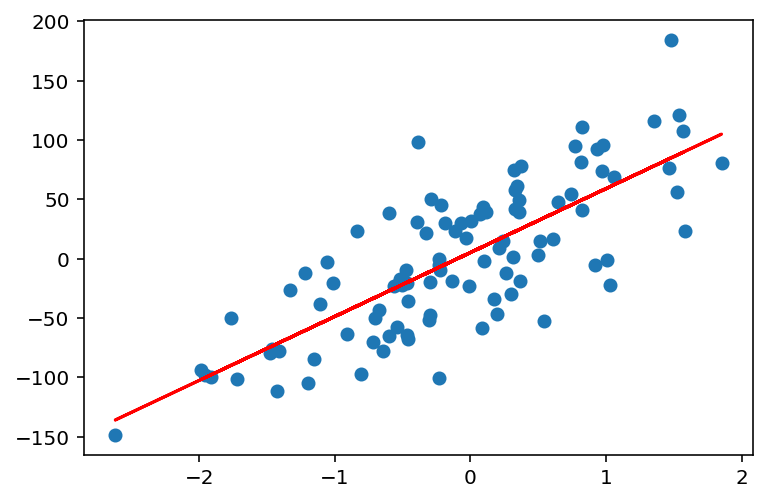

In [4]:
_ = plt.scatter(x,y)
plt.plot(x, lr.predict(x), color='red')

E se quisésemmos medir a quantidade de pessoas que frequentam um transporte público e temos essa medida por horas. Esperamos que tenhamos picos em alguns momentos e ocorra uma certa "oscilação". Normalizamos o eixo y entre $-1$ e $1$ e temos o grafo abaixo

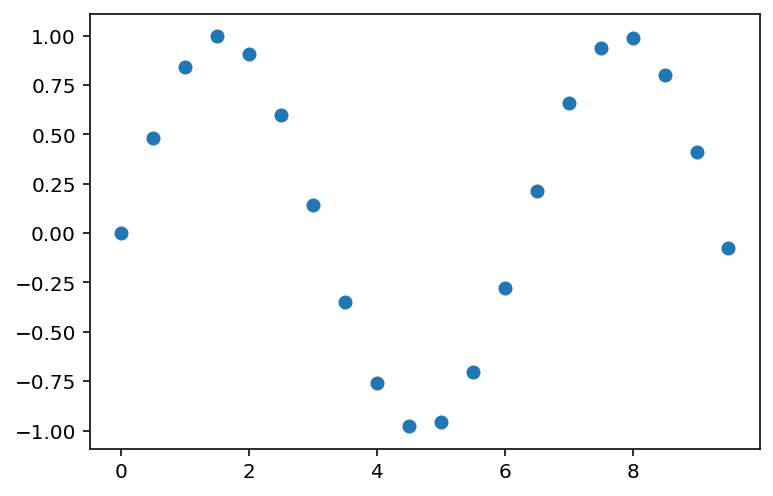

In [5]:
x = np.arange(0, 10, 0.5).reshape(-1, 1)
y  = np.sin(x)
plt.scatter(x, y)

In [6]:
lr = LinearRegression()
lr.fit(x ,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

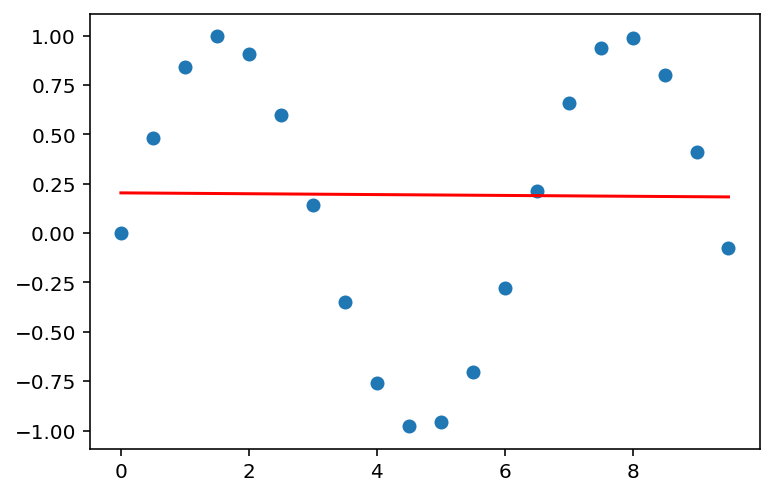

In [7]:
_ = plt.scatter(x,y)
plt.plot(x, lr.predict(x), color='red')

![](https://media.giphy.com/media/WpaVhEcp3Qo2TjwyI1/giphy.gif)


Não parece muito bom, certo?



# A árvore de decisão

Vamos ver como um modelo **não linear** se comporta aqui

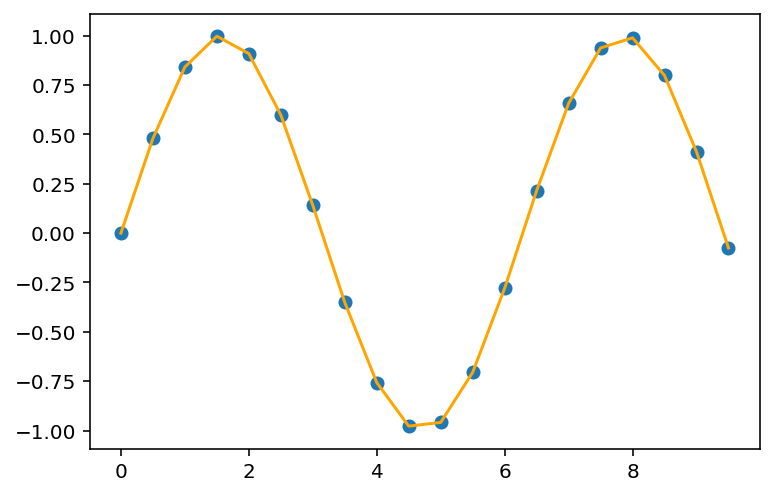

In [8]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x, y)

_ = plt.scatter(x,y)
plt.plot(x, dt.predict(x), color='orange')

Muito melhor né?


Árvores de Decisão são algoritmos bastante conhecidos e usados na prática. O legal é que a **intuição** por trás dela é bastante conhecida. Afinal, usamos tomada de decisão baseada em regras em vários momentos da nossa vida. Veja esse exemplo sobre o processo de publicação da Higher School of Economics, uma universidade Russa.

![](../imgs/publication.png)

[Source](https://mlcourse.ai/articles/topic3-dt-knn/)


De maneira intuitiva, então, uma árvore de decisão é um processo de escolha de features que ajudem melhor a "separar" os dados. Por exemplo veja o caso em que queremos prever se uma pessoa **fica em uma empresa nos após 12 meses**

![](../imgs/decision-tree.png)

# O Algoritmo

O Algoritmo por trás da árvore de decisão é relativamente simples

>```
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t
```

Logo, **estamos** quebrando a árvore de acordo com algum critério até um critério de parada


## O Critério de Parada

Existem vários critérios de parada. Um dos mais comuns é a ideia de **Entropia**

In [9]:
from IPython.display import YouTubeVideo

In [10]:
YouTubeVideo('2s3aJfRr9gE')

No caso da árvore, eu quebro na feature cuja entropia resulta no maior ganho de informação possível. Mais informações [aqui](https://medium.com/@rishabhjain_22692/decision-trees-it-begins-here-93ff54ef134) e [aqui](https://mlcourse.ai/articles/topic3-dt-knn/)

*No caso da regressão a ideia é parecida, o critério de decisão quer isolar em uma folha variáveis que tenham a menor variância do target, ou seja, a dispersão é baixa em cada folha*

# Visualização

Uma das vantagens da árvore de decisão é que podemos visualizar de maneira clara e direta as decisões que ela tomou. 

Por exemplo, suponha que queremos prever se uma passoa irá pagar a dívida dela com o banco

In [11]:
data = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [2500, 8000, 2100, 360, 530, 5900, 740, 700, 3300, 1020, 880],
                      'Paid': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data

,Age,Salary,Paid
0,17,2500,1
1,64,8000,0
2,18,2100,1
3,20,360,0
4,38,530,1
5,49,5900,0
6,55,740,0
7,25,700,1
8,29,3300,1
9,31,1020,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

age_sal_tree = DecisionTreeClassifier(random_state=17, criterion='entropy')
age_sal_tree.fit(data[['Age', 'Salary']].values, data['Paid'].values);

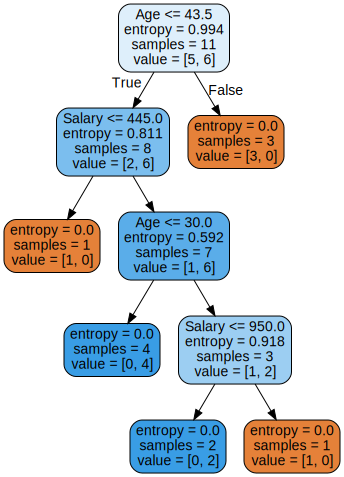

In [13]:
tree_clf = export_graphviz(age_sal_tree,
                           out_file=None, 
                           feature_names=['Age', 'Salary'],
                           filled=True, rounded=True)
graph = graphviz.Source(tree_clf)
graph

# Trazendo pros nossos dados

In [14]:
numerical_cols = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF1",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
]
target = ['SalePrice']

In [17]:
DATAPATH = '../../data'

In [18]:
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)

In [19]:
def obtain_metrics(y_true, y_pred):
    print(f"R2 do Modelo: {r2_score(y_true, y_pred)}")
    print(f"MSE do Modelo: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE do Modelo: {np.sqrt(mean_squared_error(y_true, y_pred))}")

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data[numerical_cols], data[target], train_size=0.8, random_state=42
)  # reproducibilidade

In [24]:
mean_ = X_train[numerical_cols].mean()

In [25]:
from sklearn.model_selection import cross_val_score
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train[numerical_cols].fillna(mean_), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [26]:
mean_ = X_train[numerical_cols].mean()
scores = cross_val_score(dt, X_train[numerical_cols].fillna(mean_), y_train, cv=3, scoring='r2')

In [27]:
scores.mean()

0.6802428673744915

In [28]:
X_train.shape, X_test.shape

((1168, 35), (292, 35))

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, dt.predict(X_test[numerical_cols].fillna(mean_)))

0.7557679719280429

# Os Hiperparâmetros


Lembram do conceito de `Epoch` e `Learning rate` ensinados mais cedo? Árvores também tem alguns parâmetros que **não são aprendidos** e que nós devemos passar. São alguns deles:

- max_depth – profundiade máxima da árvore;

- max_features - numero máximo de features usadas para fazer a busca de melhor quebra (this is necessary with a large number of features because it would be "expensive" to search for partitions for all features);

- min_samples_leaf - número mínimo de amostras que eu quero ter por folha


Apesar do modelo não aprender, podemos **aprender** esses parâmetros. Esse processo é chamado de **tunagem de hiperparâmetros**

In [30]:
dt.max_depth, dt.max_features, dt.min_samples_leaf

(None, None, 1)

In [31]:
parameters = {'max_depth':[3,4,5,6,7,8,9,10, None],
              'max_features': [None, 5, 15, 20, 30],
              'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10] 
             }

In [32]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(dt, parameters, cv=3)

In [33]:
clf.fit(X_train[numerical_cols].fillna(mean_), y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=42,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None],
                         'max_features': [None, 5, 15, 20, 30],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},


In [34]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [35]:
np.mean(clf.cv_results_['mean_test_score'])

0.7036598511384066

In [36]:
clf.best_params_

{'max_depth': None, 'max_features': 30, 'min_samples_leaf': 6}

In [37]:
r2_score(y_test, clf.predict(X_test[numerical_cols].fillna(mean_)))

0.7884068417096779